In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler
from category_encoders.ordinal import OrdinalEncoder
from sklearn.model_selection import StratifiedKFold

from sklearn.cluster import KMeans
from catboost import CatBoostClassifier, Pool

In [8]:
!pip3 install category_encoders

     |████████████████████████████████| 82 kB 1.3 MB/s eta 0:00:011
     |████████████████████████████████| 9.7 MB 112 kB/s eta 0:00:011
     |████████████████████████████████| 233 kB 486 kB/s eta 0:00:01
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.10/bin/python3.10 -m pip install --upgrade pip' command.


In [3]:
mov = pd.read_csv("asset/new/train1.0.csv")
y = pd.read_csv('asset/new/y_train.csv')

In [4]:
mov['num'] = y['boxoffice_num0']

In [5]:
mov = mov.drop(columns = 'Unnamed: 0')

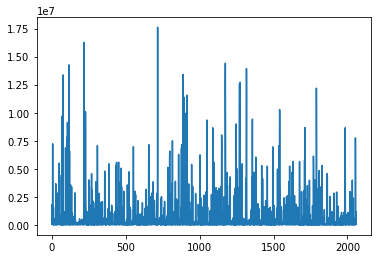

In [6]:
plt.plot(mov['num'])

In [7]:
mov['lognum'] = np.log(mov['num'])

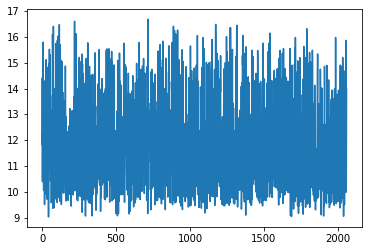

In [8]:
plt.plot(mov['lognum'])

In [9]:
# create a list of our conditions
conditions = [
    (mov['lognum'] <= 10),
    (mov['lognum'] > 10) & (mov['lognum'] <= 11),
    (mov['lognum'] > 11) & (mov['lognum'] <= 12),
    (mov['lognum'] > 12) & (mov['lognum'] <= 13),
    (mov['lognum'] > 13) & (mov['lognum'] <= 14),
    (mov['lognum'] > 14) & (mov['lognum'] <= 15),
    (mov['lognum'] > 15) & (mov['lognum'] <= 16),
    (mov['lognum'] > 16)
    ]

# create a list of the values we want to assign for each condition
values = [0, 1, 2, 3, 4, 5, 6, 7]

# create a new column and use np.select to assign values to it using our lists as arguments
mov['catnum'] = np.select(conditions, values)

In [10]:
mov['nation2'] = mov['nation2'].astype('object')
mov['major_distributor'] = mov['major_distributor'].astype('object')
mov['grade'] = mov['grade'].astype('object')
mov['gen1'] = mov['gen1'].astype('object')
mov['gen2'] = mov['gen2'].astype('object')
mov['gen3'] = mov['gen3'].astype('object')
mov['gen4'] = mov['gen4'].astype('object')
mov['gen5'] = mov['gen5'].astype('object')
mov['gen6'] = mov['gen6'].astype('object')
mov['gen7'] = mov['gen7'].astype('object')
mov['gen8'] = mov['gen8'].astype('object')
mov['gen9'] = mov['gen9'].astype('object')
mov['gen10'] = mov['gen10'].astype('object')
mov['gen11'] = mov['gen11'].astype('object')
mov['gen12'] = mov['gen12'].astype('object')
mov['gen13'] = mov['gen13'].astype('object')
mov['gen14'] = mov['gen14'].astype('object')
mov['gen15'] = mov['gen15'].astype('object')
mov['gen16'] = mov['gen16'].astype('object')
mov['gen17'] = mov['gen17'].astype('object')
mov['gen18'] = mov['gen18'].astype('object')

In [12]:
def train_test_split(df, train_percent=.6, test_percent=.4, seed=None):
    np.random.seed(seed)
    perm = np.random.permutation(df.index)
    m = len(df.index)
    train_end = int(train_percent * m)
    test_end = int(test_percent * m) + train_end
    train = df.iloc[perm[:train_end]]
    test = df.iloc[perm[train_end:test_end]]
    return train, test

In [13]:
mov1 = train_test_split(mov)

In [14]:
train = mov1[0]
test = mov1[1]

In [15]:
train

,month,year,num_of_screen0,num_of_screening0,nation2,num_of_ch,major_distributor,grade,time,gen1,...,gen16,gen17,gen18,a_avg_dir,r_avg_dir,a_avg_act,r_avg_act,num,lognum,catnum
1025,7,2014,101,1733,0,0,0.0,3,99.0,0,...,0,0,0,2.257683e+05,5.498639,5.862052e+05,8.049167,16626,9.718723,0
1146,11,2015,425,12434,1,4,1.0,2,141.0,0,...,0,0,0,1.896000e+06,7.614000,6.132691e+05,8.271250,264872,12.487002,3
964,12,2013,472,6229,1,0,1.0,1,83.0,1,...,0,0,0,2.257683e+05,5.498639,2.889418e+05,5.461852,233555,12.361173,3
1243,11,2015,55,986,2,0,0.0,1,121.0,0,...,0,0,0,2.900000e+04,9.260000,2.900000e+04,9.260000,29193,10.281684,1
1085,7,2017,97,1526,1,4,0.0,4,128.0,0,...,0,0,0,9.373000e+03,7.276667,1.564967e+06,7.790179,22518,10.022070,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,7,2013,707,26905,1,1,1.0,3,125.0,0,...,0,0,0,1.431000e+06,8.456667,1.179833e+06,8.366667,1075333,13.888141,4
1346,10,2018,128,3091,1,0,0.0,4,90.0,0,...,0,0,0,9.233600e+03,6.506000,1.498735e+05,7.777500,30569,10.327742,1
915,5,2018,55,2351,2,3,0.0,3,113.0,0,...,0,0,0,2.257683e+05,5.498639,2.835350e+04,8.760250,53569,10.888726,1
1950,9,2016,167,5201,1,5,1.0,1,103.0,0,...,0,0,0,3.182800e+04,7.346000,1.315384e+06,8.138167,109137,11.600359,2


In [16]:
test

,month,year,num_of_screen0,num_of_screening0,nation2,num_of_ch,major_distributor,grade,time,gen1,...,gen16,gen17,gen18,a_avg_dir,r_avg_dir,a_avg_act,r_avg_act,num,lognum,catnum
1154,3,2017,370,4978,1,4,0.0,2,121.0,0,...,0,0,0,5.861925e+04,7.170000,2.212171e+05,8.009722,28085,10.242991,1
1945,4,2016,20,958,1,2,0.0,1,84.0,0,...,0,0,0,2.257683e+05,5.498639,2.102500e+04,6.657500,22734,10.031617,1
1749,5,2013,525,21734,1,5,1.0,1,95.0,1,...,0,0,0,2.300000e+05,9.350000,8.503015e+05,8.802519,941824,13.755574,4
886,8,2013,59,849,2,0,0.0,3,93.0,0,...,0,0,0,2.257683e+05,5.498639,2.889418e+05,5.461852,16091,9.686015,0
687,8,2014,194,4466,1,2,0.0,2,97.0,1,...,0,0,0,6.000000e+04,7.565000,5.465222e+05,8.685714,77307,11.255540,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1525,9,2017,232,4574,2,4,0.0,3,106.0,0,...,0,0,0,5.488733e+04,6.357500,4.430277e+04,8.302500,94877,11.460337,2
430,2,2013,227,4565,1,1,0.0,1,114.0,0,...,0,0,0,1.500000e+05,7.940000,2.889418e+05,5.461852,157990,11.970287,2
216,8,2018,758,16173,0,3,1.0,1,84.0,0,...,0,0,0,6.125000e+05,8.790000,2.889418e+05,8.312500,879449,13.687051,4
1314,12,2013,850,62290,2,0,1.0,3,123.0,1,...,0,0,0,1.029000e+06,8.898571,7.548964e+05,8.342000,3392699,15.037136,6


In [17]:
mov.columns

Index(['month', 'year', 'num_of_screen0', 'num_of_screening0', 'nation2',
       'num_of_ch', 'major_distributor', 'grade', 'time', 'gen1', 'gen2',
       'gen3', 'gen4', 'gen5', 'gen6', 'gen7', 'gen8', 'gen9', 'gen10',
       'gen11', 'gen12', 'gen13', 'gen14', 'gen15', 'gen16', 'gen17', 'gen18',
       'a_avg_dir', 'r_avg_dir', 'a_avg_act', 'r_avg_act', 'num', 'lognum',
       'catnum'],
      dtype='object')

In [18]:
numerical_feats = train.dtypes[train.dtypes != "object"].index.tolist()
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = train.dtypes[train.dtypes == "object"].index.tolist()
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  13
Number of Categorical features:  21


In [19]:
numerical_feats

['month',
 'year',
 'num_of_screen0',
 'num_of_screening0',
 'num_of_ch',
 'time',
 'a_avg_dir',
 'r_avg_dir',
 'a_avg_act',
 'r_avg_act',
 'num',
 'lognum',
 'catnum']

In [20]:
categorical_feats

['nation2',
 'major_distributor',
 'grade',
 'gen1',
 'gen2',
 'gen3',
 'gen4',
 'gen5',
 'gen6',
 'gen7',
 'gen8',
 'gen9',
 'gen10',
 'gen11',
 'gen12',
 'gen13',
 'gen14',
 'gen15',
 'gen16',
 'gen17',
 'gen18']

In [32]:
n_est = 2000
seed = 42
n_fold = 15
n_class = 3
target = 'catnum'
X = train.drop(target, axis=1)
y = train[target]
X_test = test

In [35]:
X_test

,month,year,num_of_screen0,num_of_screening0,nation2,num_of_ch,major_distributor,grade,time,gen1,...,gen16,gen17,gen18,a_avg_dir,r_avg_dir,a_avg_act,r_avg_act,num,lognum,catnum
1154,3,2017,370,4978,1,4,0.0,2,121.0,0,...,0,0,0,5.861925e+04,7.170000,2.212171e+05,8.009722,28085,10.242991,1
1945,4,2016,20,958,1,2,0.0,1,84.0,0,...,0,0,0,2.257683e+05,5.498639,2.102500e+04,6.657500,22734,10.031617,1
1749,5,2013,525,21734,1,5,1.0,1,95.0,1,...,0,0,0,2.300000e+05,9.350000,8.503015e+05,8.802519,941824,13.755574,4
886,8,2013,59,849,2,0,0.0,3,93.0,0,...,0,0,0,2.257683e+05,5.498639,2.889418e+05,5.461852,16091,9.686015,0
687,8,2014,194,4466,1,2,0.0,2,97.0,1,...,0,0,0,6.000000e+04,7.565000,5.465222e+05,8.685714,77307,11.255540,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1525,9,2017,232,4574,2,4,0.0,3,106.0,0,...,0,0,0,5.488733e+04,6.357500,4.430277e+04,8.302500,94877,11.460337,2
430,2,2013,227,4565,1,1,0.0,1,114.0,0,...,0,0,0,1.500000e+05,7.940000,2.889418e+05,5.461852,157990,11.970287,2
216,8,2018,758,16173,0,3,1.0,1,84.0,0,...,0,0,0,6.125000e+05,8.790000,2.889418e+05,8.312500,879449,13.687051,4
1314,12,2013,850,62290,2,0,1.0,3,123.0,1,...,0,0,0,1.029000e+06,8.898571,7.548964e+05,8.342000,3392699,15.037136,6


In [23]:
y

1025    0
1146    3
964     3
1243    1
1085    1
       ..
425     4
1346    1
915     1
1950    2
2023    0
Name: catnum, Length: 1236, dtype: int64

In [42]:
skfold = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=seed)
folds=[]

for train_idx, test_idx in skfold.split(X, y):
        folds.append((train_idx, test_idx))


In [39]:
cat_pred = np.zeros((X.shape[0], n_class))
cat_pred_test = np.zeros((X_test.shape[0], n_class))
cat_cols = categorical_feats

In [ ]:
for fold in range(n_fold):
    print(fold)

    print(f'\n----------------- Fold {fold} -----------------\n')
    train_idx, test_idx = folds[fold]
    X_train, X_test, y_train, y_test = X.iloc[train_idx], X.iloc[test_idx], y.iloc[train_idx], y.iloc[test_idx]


In [75]:
X_train

,month,year,num_of_screen0,num_of_screening0,nation2,num_of_ch,major_distributor,grade,time,gen1,...,gen15,gen16,gen17,gen18,a_avg_dir,r_avg_dir,a_avg_act,r_avg_act,num,lognum
1025,7,2014,101,1733,0,0,0.0,3,99.0,0,...,0,0,0,0,2.257683e+05,5.498639,5.862052e+05,8.049167,16626,9.718723
1146,11,2015,425,12434,1,4,1.0,2,141.0,0,...,0,0,0,0,1.896000e+06,7.614000,6.132691e+05,8.271250,264872,12.487002
964,12,2013,472,6229,1,0,1.0,1,83.0,1,...,0,0,0,0,2.257683e+05,5.498639,2.889418e+05,5.461852,233555,12.361173
1243,11,2015,55,986,2,0,0.0,1,121.0,0,...,0,0,0,0,2.900000e+04,9.260000,2.900000e+04,9.260000,29193,10.281684
1085,7,2017,97,1526,1,4,0.0,4,128.0,0,...,0,0,0,0,9.373000e+03,7.276667,1.564967e+06,7.790179,22518,10.022070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,7,2013,707,26905,1,1,1.0,3,125.0,0,...,0,0,0,0,1.431000e+06,8.456667,1.179833e+06,8.366667,1075333,13.888141
1346,10,2018,128,3091,1,0,0.0,4,90.0,0,...,0,0,0,0,9.233600e+03,6.506000,1.498735e+05,7.777500,30569,10.327742
915,5,2018,55,2351,2,3,0.0,3,113.0,0,...,0,0,0,0,2.257683e+05,5.498639,2.835350e+04,8.760250,53569,10.888726
1950,9,2016,167,5201,1,5,1.0,1,103.0,0,...,0,0,0,0,3.182800e+04,7.346000,1.315384e+06,8.138167,109137,11.600359


In [74]:
    train_data = Pool(data=X_train, label=y_train, cat_features=cat_cols)
    valid_data = Pool(data=X_test, label=y_test, cat_features=cat_cols)
    model_cat = CatBoostClassifier()
    model_cat.fit(train_data, eval_set=valid_data, use_best_model=True, early_stopping_rounds=100, verbose=100)
    cat_pred[valid_idx] = model_cat.predict_proba(X_valid)
    cat_pred_test += model_cat.predict_proba(X_test) / n_fold
    print(f'CV Log Loss Score: {log_loss(y_test, cat_pred[valid_idx]):.6f}')
    
print(f'\tLog Loss: {log_loss(y, cat_pred):.6f}')

0

----------------- Fold 0 -----------------



CatBoostError: Invalid type for cat_feature[non-default value idx=0,feature_idx=6]=0.0 : cat_features must be integer or string, real number values and NaN values should be converted to string.

1025    0
1146    3
964     3
1243    1
1085    1
       ..
425     4
1346    1
915     1
1950    2
2023    0
Name: catnum, Length: 1153, dtype: int64

In [62]:
    train_data = Pool(data=X_train, label=y_train, cat_features=cat_cols)
    valid_data = Pool(data=X_test, label=y_test, cat_features=cat_cols)
    model_cat = CatBoostClassifier()
    model_cat.fit(train_data, eval_set=valid_data, use_best_model=True, early_stopping_rounds=100, verbose=100)
    cat_pred[valid_idx] = model_cat.predict_proba(X_valid)
    cat_pred_test += model_cat.predict_proba(X_test) / n_fold
    print(f'CV Log Loss Score: {log_loss(y_test, cat_pred[valid_idx]):.6f}')
    
print(f'\tLog Loss: {log_loss(y, cat_pred):.6f}')

0

----------------- Fold 0 -----------------



CatBoostError: Invalid type for cat_feature[non-default value idx=0,feature_idx=6]=0.0 : cat_features must be integer or string, real number values and NaN values should be converted to string.

In [165]:
plot_feature_importance(model_cat.get_feature_importance(),X_test.columns,'CATBOOST')

NameError: name 'model_cat' is not defined